# Day 13 In-Class: Using Resources from Online

### <p style="text-align: right;"> &#9989; Kaitlyn Watson</p>

## Learning Goals:

By the end of this assignment, you should be able to:
- Compare and evaluate datasets
- Make visualizations using tools that you found online
- Present a dataset using visualizations

## Introduction

The goal of this assignment is for you and your group to make one or more visualizations of real-world data and then share these visualizations with the rest of the class. This is meant to be a kind of test run of the skills you’ll be expected to demonstrate for the semester project.

In the pre-class assignment, you were tasked with finding a dataset and a new plotting tool using online resources. In today’s assignment, you will be:
1. Sharing the datasets and plotting tools you found in the pre-class assignment with your group. 
1. Picking (as a group) one dataset to work with
1. Using one or more of the plotting tools to make one or more visualizations of the data
1. Sharing the visualization(s) that you made with the rest of the class

## 1. Sharing out with your group

#### &#9989;&nbsp; **TASK** As a group, take turns sharing your datasets and plotting tools with one another.

1. Me: Data=UNICEF: Maternal and Newborn Health Coverage Plot=Categorical based on Level and Value
2. Carson: Group Bar Chart 
3. James: Data=FAO: Stats USA Avocade Production Sales  Plot=Group Bar Chart
4. Matt: Data=Kaggle: Olympic Data for athletes Plot: Bar Chart 
5. Tara: Data= CDC: Prevelance of Self-Reported Obesity VS. State Plot=Stem Plot




## 2. Picking one dataset to work with

#### &#9989;&nbsp; **TASK** As a group, pick one of the datasets to work with. When deciding on which dataset to use, keep in mind that you will need to use it to make one or more visualizations.

## 3. Create one or more visualizations of your dataset

#### &#9989;&nbsp; **TASK** As a group, create one or more visualizations of this dataset. 

**Example** Below are two example plots, which have been created using the data retrived in the example in the pre-class assignment (I.e., Cocoa Export data taken from the FAO). If I were presenting these plots, I would probably use the linear plot to note how much of the total exports are coming from just a small handful of countries--most of which are on Africa's west coast--and put special empahsis on the dominant role played by the Cote d'Ivoire. I would then use the log plot to talk about how there are still many countries that have *some* Cocoa bean exports, just significantly less than the top few countries. 


<img src="https://github.com/msu-cmse-courses/cmse201-S22-data/blob/main/Day-13_NEW/Linear_Plot_Cocoa_Beans_Export.jpg?raw=true" width=1000px>

<img src="https://github.com/msu-cmse-courses/cmse201-S22-data/blob/main/Day-13_NEW/Log_Plot_Cocoa_Beans_Export.jpg?raw=true" width=1000px>

In [6]:
#Write the code for your visualizations here
#Every member of your group should have this code in their final notebooks.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Loading Datadet
wo22 = pd.read_csv('Medalists.csv', skiprows = 0)
wo22

,NAME,NOC,SPORTS,EVENT,MEDAL
0,STROLZ Johannes,Austria,Alpine Skiing,Men's Alpine Combined,Gold
1,FEUZ Beat,Switzerland,Alpine Skiing,Men's Downhill,Gold
2,ODERMATT Marco,Switzerland,Alpine Skiing,Men's Giant Slalom,Gold
3,MAYER Matthias,Austria,Alpine Skiing,Men's Super-G,Gold
4,NOEL Clement,France,Alpine Skiing,Men's Slalom,Gold
...,...,...,...,...,...
689,LOLLOBRIGIDA Francesca,Italy,Speed Skating,Women's Mass Start,Bronze
690,de JONG Antoinette,Netherlands,Speed Skating,Women's Team Pursuit,Bronze
691,GROENEWOUD Marijke,Netherlands,Speed Skating,Women's Team Pursuit,Bronze
692,SCHOUTEN Irene,Netherlands,Speed Skating,Women's Team Pursuit,Bronze


In [10]:
countries = []
countries.append(wo22['NOC'][1])
for country in wo22['NOC']:
        if country not in countries:
            countries.append(country) #https://stackoverflow.com/questions/17370984/appending-an-id-to-a-list-if-not-already-present-in-a-string

            
#Creates a dataframe
medal_count = pd.DataFrame(countries, columns = ['Country'])
medal_count['Gold'] = [0] * len(medal_count['Country'])
medal_count['Silver'] = [0] * len(medal_count['Country'])   #Creates zero medal count for each country
medal_count['Bronze'] = [0] * len(medal_count['Country']) 
medal_count['Total'] = [0] * len(medal_count['Country'])
        
#Medal Count for each country
for i in range(len(wo22['NOC'])):
    for j in range(len(medal_count['Country'])):            #Tests each medal if it matches a country in medal_count
        if wo22['NOC'][i] == medal_count['Country'][j]:
            if wo22['MEDAL'][i] == 'Gold':
                medal_count.at[j, 'Gold'] = medal_count.at[j, 'Gold'] + 1
            elif wo22['MEDAL'][i] == 'Silver':
                medal_count.at[j, 'Silver'] = medal_count.at[j, 'Silver'] + 1     #Increases corrsiponding step size by 1
            else:
                medal_count.at[j, 'Bronze'] = medal_count.at[j, 'Bronze'] + 1
                
#Total Count
golds = np.array(medal_count['Gold'])
silvers = np.array(medal_count['Silver'])
bronze = np.array(medal_count['Bronze'])
totals = golds + silvers + bronze
medal_count['Total'] = totals

#Display
medal_count

,Country,Gold,Silver,Bronze,Total
0,Switzerland,7,2,5,14
1,Austria,15,10,5,30
2,France,6,13,5,24
3,Sweden,15,6,13,34
4,Slovakia,1,0,25,26
5,Norway,28,12,18,58
6,Germany,22,26,12,60
7,United States of America,11,40,12,63
8,Finland,26,3,26,55
9,ROC,17,46,23,86


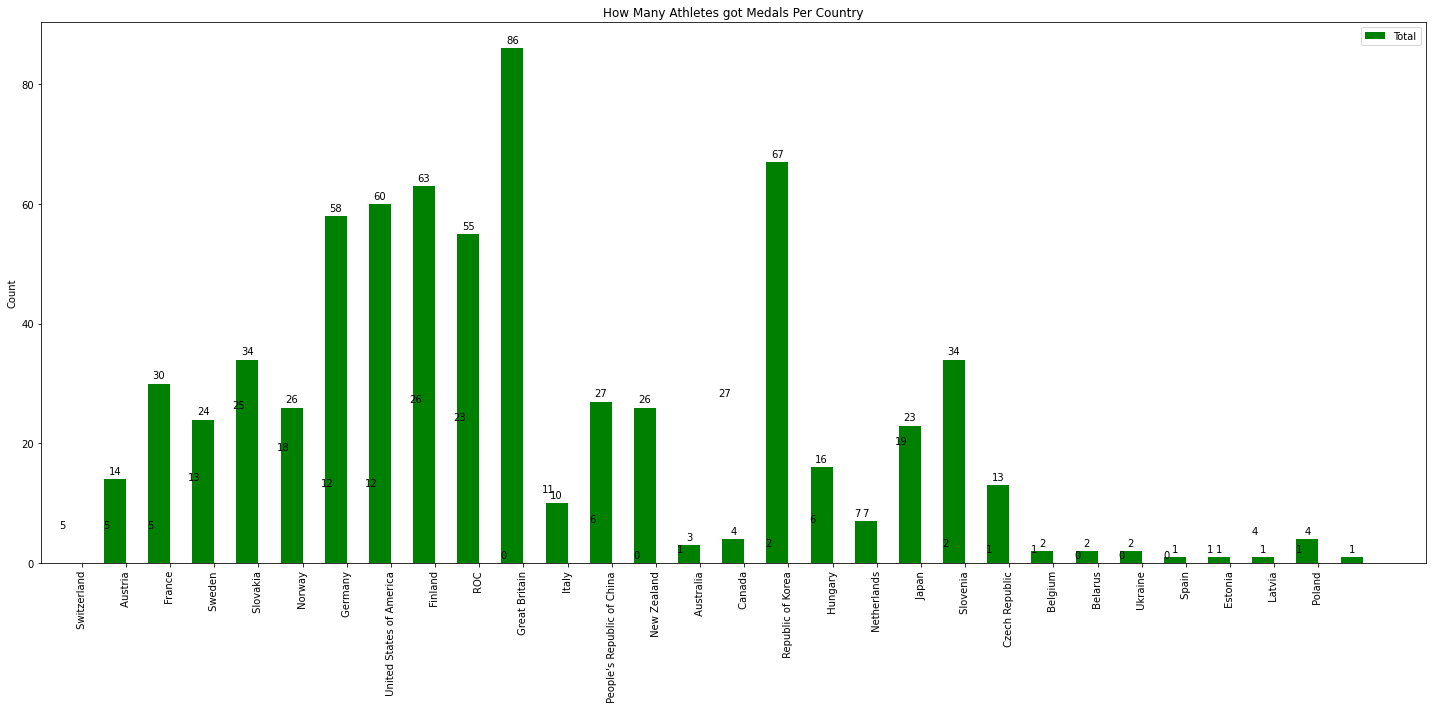

In [18]:
labels = np.array(medal_count['Country'])

total_count = np.array(medal_count['Total'])

x = np.arange(len(labels))  # the label locations
width = 0.5 # the width of the bars

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)

total_bar = ax.bar(x + width*3, total_count, width, label = 'Total', color = 'g')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count')
plt.title('How Many Athletes got Medals Per Country')
plt.xticks(x + 1.5*width, labels, rotation = 90)
plt.legend()


plt.bar_label(bronze_bar, padding=3)
plt.bar_label(total_bar, padding=3)

fig.tight_layout() 

plt.show()

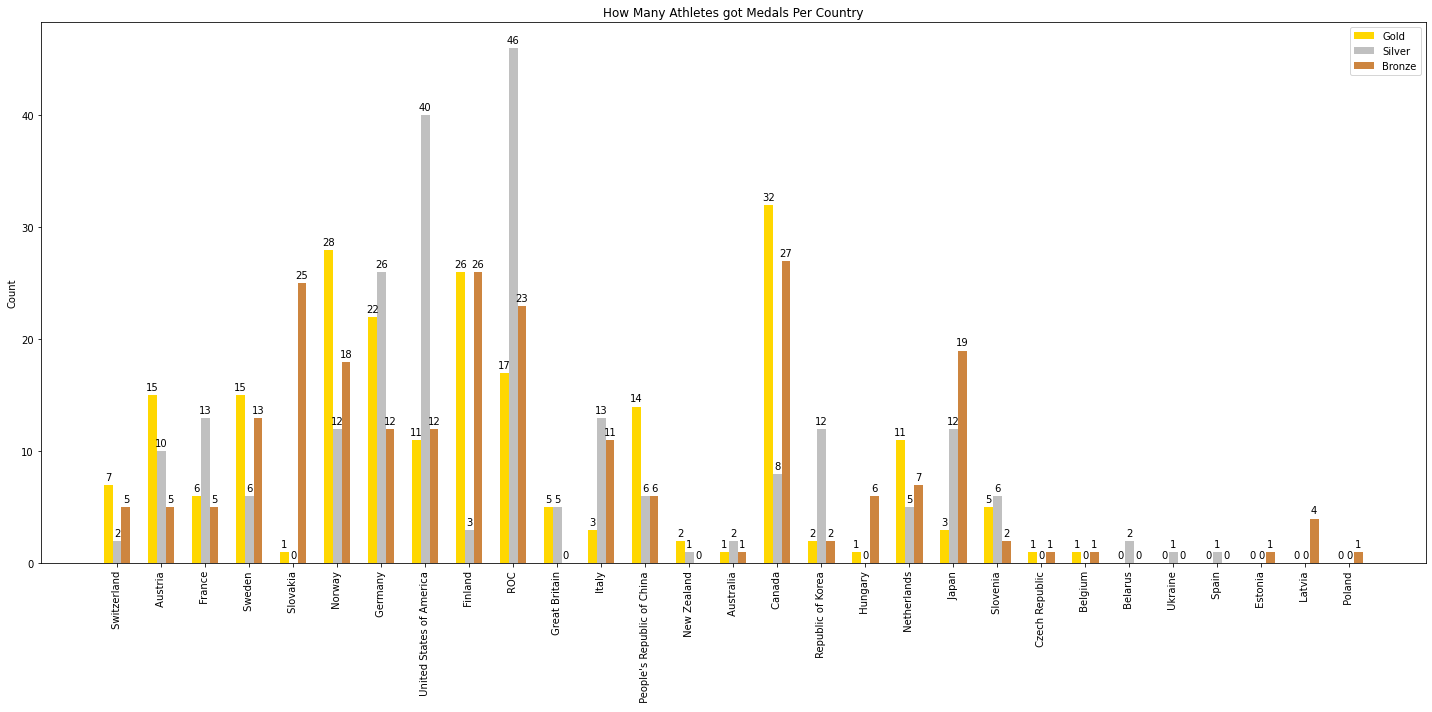

In [19]:
#Plot
labels = np.array(medal_count['Country'])
gold_count = np.array(medal_count['Gold'])
silver_count = np.array(medal_count['Silver'])
bronze_count = np.array(medal_count['Bronze'])


x = np.arange(len(labels))  # the label locations
width = 0.20 # the width of the bars

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
gold_bar = ax.bar(x + width*0, gold_count, width, label='Gold', color = 'gold')
silver_bar = ax.bar(x + width*1, silver_count, width, label='Silver', color = 'silver')
bronze_bar = ax.bar(x + width*2, bronze_count, width, label = 'Bronze', color = 'peru')


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count')
plt.title('How Many Athletes got Medals Per Country')
plt.xticks(x + 1*width, labels, rotation = 90)
plt.legend()

plt.bar_label(gold_bar, padding=3) #These display values on top of bar, padding is space above
plt.bar_label(silver_bar, padding=3)
plt.bar_label(bronze_bar, padding=3)


fig.tight_layout() 

plt.show()

## 4. Present your visualizations to the rest of the class

#### &#9989;&nbsp; **TASK** As a group, you will present your visualizations to the rest of the class to tell the rest of the class about the specific dataset that you’ve chosen to work with. Your instructor should have shared a Google Slides presentation with you. Put your visualizations on your slide, and decide how you are going to present them to the rest of the class. 

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [1]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload it there. Make sure your name is on it.

See you next class!

Copyright &#169; 2021, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu/) at Michigan State University, All rights reserved.